# Random Forest and Boosting Lab

In this lab we will practice using Random Forest Regressor and Boosted Trees Regressor on the Project 6 Data.

> Instructor Notes:
- This walks the students through a sample dataset, they should actually do it on the full dataset they have created as part of Project 6.
- The code for this lab is shorter than usual in order to give the students time to practice with Tableau.

## 1. Load and inspect the data

As part of your work of project 6 you should have retrieved the top 250 movies from IMDB. Conduct this lab on the data you have retrieved.

In the [asset folder](../../assets/datasets/imdb_p6_sample.csv) you can find a subset of the movies, in case you have not completed yet Project 6.

1. Load the dataset and inspect it
- Assign the rating to a y vector and the binary columns to an X feature matrix
- What would you do with the year variable?
> Answer: normalize it and use it as feature

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [152]:
mov = pd.read_csv('../../assets/datasets/imdb_p6_sample.csv')

In [153]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 13 columns):
HA                26 non-null int64
rating            26 non-null float64
tconst            26 non-null object
title             26 non-null object
year              26 non-null int64
excellent         26 non-null int64
great             26 non-null int64
love              26 non-null int64
beautiful         26 non-null int64
best              26 non-null int64
hope              26 non-null int64
groundbreaking    26 non-null int64
amazing           26 non-null int64
dtypes: float64(1), int64(10), object(2)
memory usage: 2.7+ KB


In [154]:
mov.head()

,HA,rating,tconst,title,year,excellent,great,love,beautiful,best,hope,groundbreaking,amazing
0,1633889,9.3,tt0111161,The Shawshank Redemption,1994,0,1,0,1,0,0,0,1
1,1118799,9.2,tt0068646,The Godfather,1972,1,1,0,0,1,0,1,0
2,762879,9.0,tt0071562,The Godfather: Part II,1974,1,1,0,0,1,0,0,1
3,1616346,9.0,tt0468569,The Dark Knight,2008,1,1,1,0,1,0,1,1
4,835155,8.9,tt0108052,Schindler's List,1993,1,1,1,1,1,1,1,1


In [155]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import minmax_scale

In [156]:
mov['year_norm'] = minmax_scale(mov[['year']], axis=0)

In [233]:
X = mov[['excellent', 'great', 'love', 'beautiful', 'best', 'hope', 'groundbreaking', 'amazing','year_norm']]
y = mov.rating
print X.shape
print y.shape

(26, 9)
(26,)


## 2. Decision Tree Regressor


1. Train a decision tree regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
    - They should align to a diagonal line.
- Add some text to the plot indicating the average $R^2$ coefficient

In [234]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score, KFold, cross_val_predict

In [235]:
#This is needed for classifiers and maybe regressors
cv = KFold(len(y), n_folds=5, shuffle=True)

In [236]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
#pipe = Pipeline(MinMaxScaler(), DecisionTreeRegressor())

[-0.03666667 -0.014      -0.056      -0.158      -0.066     ]
0.0661333333333 0.0492511026385


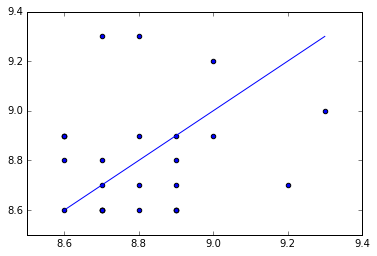

In [237]:
dtr = DecisionTreeRegressor()
dtr.fit(X, y)
scores = cross_val_score(dtr, X, y, cv=cv, scoring='mean_squared_error')
print scores
print scores.mean()*-1, scores.std()

pred_y = cross_val_predict(dtr, X, y, cv=cv)
plt.scatter(y, pred_y)
plt.plot(y,y)
plt.show()

## 3. Random Forest Regressor


1. Train a random forest regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- How does this plot compare with the previous one?
> Answer: points are tighter now, indicating a better fit

In [238]:
from sklearn.ensemble import RandomForestRegressor

In [239]:
RandomForestRegressor?

[-0.01815 -0.009   -0.06236 -0.075   -0.059  ]
0.044702 0.0261298606196


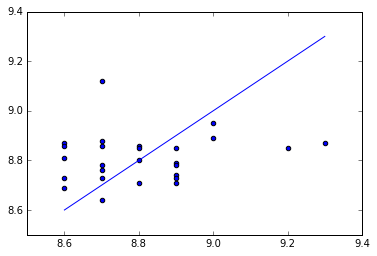

In [240]:
rfr = RandomForestRegressor()
rfr.fit(X, y)
scores = cross_val_score(rfr, X, y, cv=cv, scoring='mean_squared_error')
print scores
print scores.mean()*-1, scores.std()

pred_y = cross_val_predict(rfr, X, y, cv=cv)
plt.scatter(y, pred_y)
plt.plot(y,y)
plt.show()

## 4. AdaBoost Regressor


1. Train a AdaBoost regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

In [241]:
from sklearn.ensemble import AdaBoostRegressor

In [242]:
AdaBoostRegressor?

[-0.01538354 -0.01343622 -0.06904321 -0.086      -0.038     ]
0.0443725946922 0.0289119851794


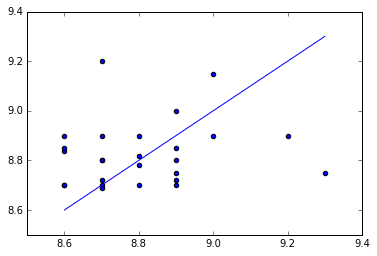

In [243]:
abr = AdaBoostRegressor()
abr.fit(X, y)
scores = cross_val_score(abr, X, y, cv=cv, scoring='mean_squared_error')
print scores
print scores.mean()*-1, scores.std()

pred_y = cross_val_predict(abr, X, y, cv=cv)
plt.scatter(y, pred_y)
plt.plot(y,y)
plt.show()

## 4. Gradient Boosting Trees Regressor


1. Train a Gradient Boosting Trees regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

In [244]:
from sklearn.ensemble import GradientBoostingRegressor

In [245]:
GradientBoostingRegressor?

[-0.01625757 -0.00618172 -0.05771092 -0.09333305 -0.051254  ]
0.0449474532119 0.0312081250039


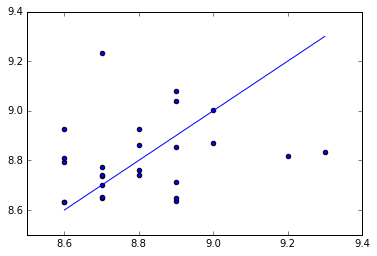

In [246]:
gbr = GradientBoostingRegressor()
gbr.fit(X, y)
scores = cross_val_score(gbr, X, y, cv=cv, scoring='mean_squared_error')
print scores
print scores.mean()*-1, scores.std()

pred_y = cross_val_predict(gbr, X, y, cv=cv)
plt.scatter(y, pred_y)
plt.plot(y,y)
plt.show()

## Bonus

Take the best model and try to improve it using grid search.

In [250]:
from sklearn.grid_search import GridSearchCV

In [251]:
params = {'max_depth':[1,2,3,4,5],
          'max_features': ['auto', 'sqrt', 'log2']
        }

gs = GridSearchCV(estimator=rfr, param_grid=params, scoring='mean_squared_error', n_jobs=-1)

In [252]:
gs.fit(X,y)
print gs.best_params_
print gs.best_score_*-1

{'max_features': 'sqrt', 'max_depth': 1}
0.058724148562
